# WeatherPy
## Observable Trends

* Temperature increases the closer to the equator (0 degrees latitude) the city is; peaking around 20 degrees latitude. In the plot below, Temperature creates a bell curve on either side of the equator. 

* Like temperature, Humidity increases the farther away you are from the equator.  Unlike temperature, the plot below does not show Humidity in a bell curve, but instead is fairly consistent across all latitudes shown.

* Cloudiness does not appear to correlate with latitude as the plot below shows pretty even spread across all latitudes shown. 

* Wind speed increases a bit between 30 and 60 degrees latitude. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement and append
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Punta Arenas
Processing Record 2 | Rikitea
Processing Record 3 | Hobart
Processing Record 4 | Nanortalik
Processing Record 5 | Buala
Processing Record 6 | Victoria
Processing Record 7 | Viedma
Processing Record 8 | Saint-Philippe
Processing Record 9 | Fiumicino
Processing Record 10 | Gizo
Processing Record 11 | Sao Filipe
Processing Record 12 | Margate
Processing Record 13 | Qaanaaq
Processing Record 14 | Vaini
City not found. Skipping...
Processing Record 15 | Tasiilaq
Processing Record 16 | Usinsk
Processing Record 17 | Malanje
Processing Record 18 | Matamoros
Processing Record 19 | Lompoc
Processing Record 20 | Albany
Processing Record 21 | Saint-Francois
City not found. Skipping...
Processing Record 22 | Avarua
Processing Record 23 | Busselton
Processing Record 24 | Ushuaia
Processing Record 25 | Puerto Ayora
Processing Record 26 | Camacha
Processing Record 27 | College
Processing Record 28 | Bijie
City 

Processing Record 228 | Skibbereen
Processing Record 229 | Ponta do Sol
Processing Record 230 | Husavik
Processing Record 231 | Lerwick
City not found. Skipping...
Processing Record 232 | Easton
Processing Record 233 | Jasper
Processing Record 234 | Alta
Processing Record 235 | Hirara
Processing Record 236 | Havelock
Processing Record 237 | Fukue
Processing Record 238 | Aksu
City not found. Skipping...
Processing Record 239 | Clyde River
Processing Record 240 | Kokstad
Processing Record 241 | Yushan
Processing Record 242 | Katsuura
Processing Record 243 | Quba
Processing Record 244 | Sidi Ali
City not found. Skipping...
Processing Record 245 | Vanavara
Processing Record 246 | Almora
Processing Record 247 | Grindavik
Processing Record 248 | Lamar
Processing Record 249 | Coos Bay
Processing Record 250 | Tahoua
Processing Record 251 | Sovetskiy
Processing Record 252 | Praia da Vitoria
Processing Record 253 | Pisco
Processing Record 254 | Hilpoltstein
Processing Record 255 | Ust-Maya
Proce

Processing Record 451 | Uruacu
Processing Record 452 | Coruripe
Processing Record 453 | Carutapera
Processing Record 454 | Monrovia
Processing Record 455 | Zapolyarnyy
Processing Record 456 | Vardo
City not found. Skipping...
City not found. Skipping...
Processing Record 457 | Redcliffe
Processing Record 458 | Coruche
Processing Record 459 | Urusha
Processing Record 460 | Salima
Processing Record 461 | Kargil
Processing Record 462 | Balibago
Processing Record 463 | Toora-Khem
Processing Record 464 | Voh
Processing Record 465 | Bowen
Processing Record 466 | Kirksville
Processing Record 467 | Namibe
Processing Record 468 | La Roche-sur-Yon
Processing Record 469 | Murgab
Processing Record 470 | Stromness
Processing Record 471 | Hamilton
Processing Record 472 | Ekibastuz
Processing Record 473 | Kapit
Processing Record 474 | De Aar
Processing Record 475 | San Quintin
Processing Record 476 | Baripada
Processing Record 477 | Lethem
Processing Record 478 | Ino
Processing Record 479 | Qasigiann

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness": cloudiness, 
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv('output_csv/weather_data.csv')

# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,90,CL,1563115272,85,-53.16,-70.91,32.00,6.93
1,Rikitea,7,PF,1563115273,85,-23.12,-134.97,74.39,16.44
2,Hobart,75,AU,1563115278,70,-42.88,147.33,42.80,10.29
3,Nanortalik,98,GL,1563115279,89,60.14,-45.24,40.37,4.92
4,Buala,100,SB,1563115280,85,-8.15,159.59,76.55,4.47


### Latitude vs. Temperature Plot

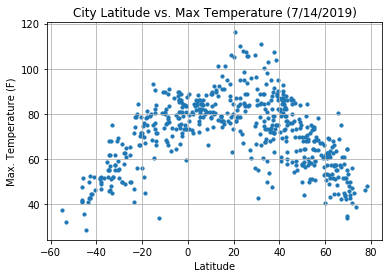

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (7/14/2019)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()


### Latitude vs. Humidity Plot

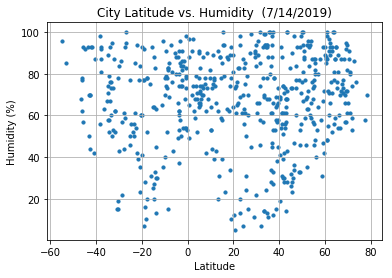

In [8]:
# Build a scatter plot for each data type

#Dealing with outlying data skewing chart - Puerto Maldonado showed Humidity of 334
weather_data = weather_data.loc[weather_data['Humidity'] <= 101]

plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity  (7/14/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()



### Latitude vs. Cloudiness Plot

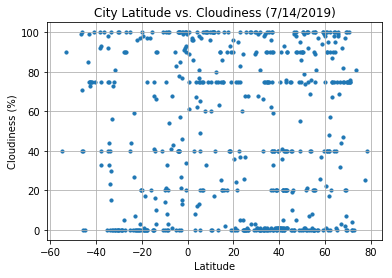

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (7/14/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()



### Latitude vs. Wind Speed Plot


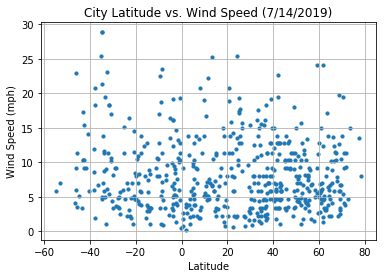

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (7/14/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()
